In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path = "/content/drive/MyDrive/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("hand_gesture_data")

print("✅ Extracted successfully!")


✅ Extracted successfully!


In [ ]:
import os
print(os.listdir("hand_gesture_data"))


['leapGestRecog', 'leapgestrecog']


In [ ]:
import cv2
import numpy as np

IMG_SIZE = 128
data = []
labels = []

base_path = "hand_gesture_data/leapGestRecog"  # Inside extracted zip

# Traverse user folders
for user in os.listdir(base_path):
    user_path = os.path.join(base_path, user)
    if not os.path.isdir(user_path): continue

    for gesture in os.listdir(user_path):
        gesture_path = os.path.join(user_path, gesture)
        if not os.path.isdir(gesture_path): continue

        for img_file in os.listdir(gesture_path):
            if not img_file.endswith('.png'): continue
            img_path = os.path.join(gesture_path, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None: continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            data.append(img.flatten())  # Flatten for SVM
            labels.append(gesture)

print(f"✅ Loaded {len(data)} images from Drive!")


✅ Loaded 20000 images from Drive!


In [ ]:
import cv2
import numpy as np

IMG_SIZE = 128
data = []
labels = []

base_path = "hand_gesture_data/leapGestRecog"  # Inside extracted zip

# Traverse user folders
for user in os.listdir(base_path):
    user_path = os.path.join(base_path, user)
    if not os.path.isdir(user_path): continue

    for gesture in os.listdir(user_path):
        gesture_path = os.path.join(user_path, gesture)
        if not os.path.isdir(gesture_path): continue

        for img_file in os.listdir(gesture_path):
            if not img_file.endswith('.png'): continue
            img_path = os.path.join(gesture_path, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None: continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

            data.append(img.flatten())  # Flatten for SVM
            labels.append(gesture)

print(f"✅ Loaded {len(data)} images from Drive!")


✅ Loaded 20000 images from Drive!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import numpy as np
X = np.array(data)
y = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))


✅ Accuracy: 0.99925


In [ ]:
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))



📄 Classification Report:
                precision    recall  f1-score   support

      01_palm       1.00      1.00      1.00       377
         02_l       1.00      1.00      1.00       403
      03_fist       1.00      1.00      1.00       404
04_fist_moved       1.00      1.00      1.00       392
     05_thumb       1.00      1.00      1.00       410
     06_index       1.00      1.00      1.00       366
        07_ok       1.00      1.00      1.00       409
08_palm_moved       1.00      1.00      1.00       418
         09_c       1.00      1.00      1.00       404
      10_down       1.00      1.00      1.00       417

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000



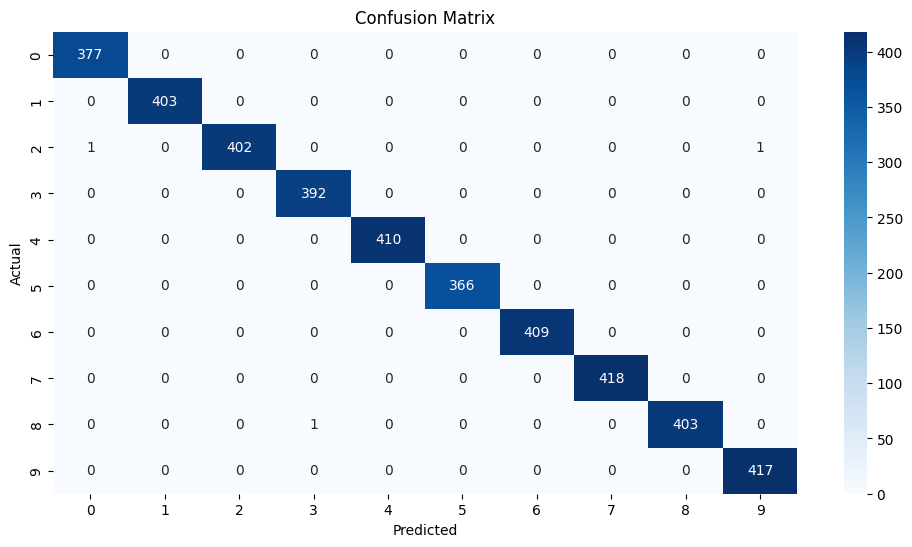

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


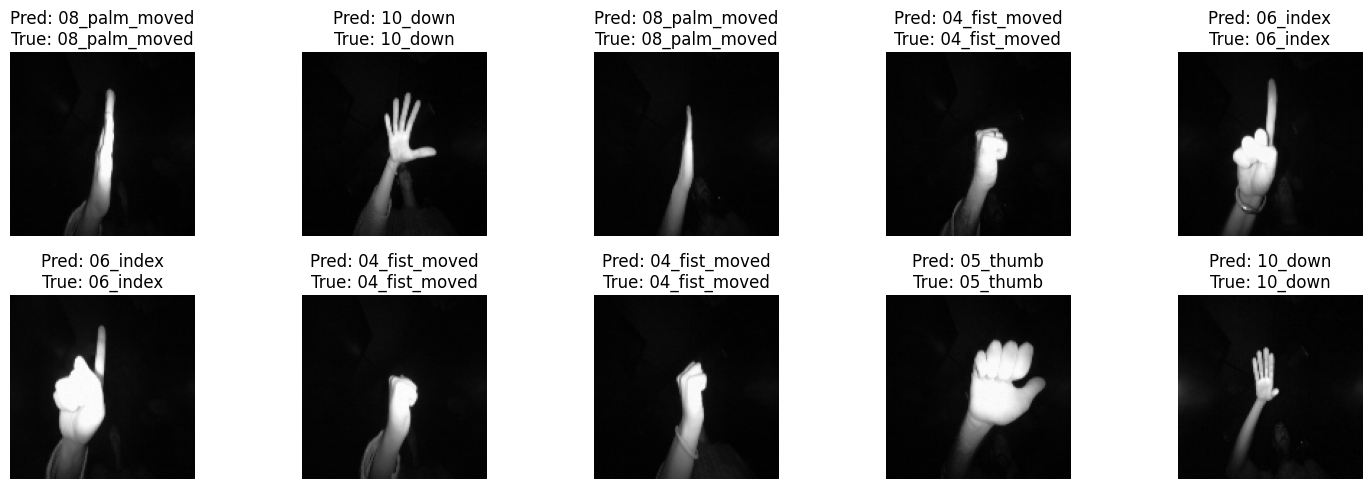

In [ ]:
import matplotlib.pyplot as plt

# Set image size (same as what you used during preprocessing)
IMG_SIZE = 128

# Visualize first 10 predictions
plt.figure(figsize=(15, 5))

for i in range(10):
    # Reshape 1D flattened image back to 2D
    img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)

    # Show image
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
